# Hypothesis Testing on AUC, F1, and BalancedAccuracy

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%cd /content/drive/MyDrive/Stage 2A/ANN_CNN_comparison_PCA/

/content/drive/MyDrive/Stage 2A/ANN_CNN_comparison_PCA


In [ ]:
cnn_metrics_1 = pd.read_csv('CNN_metrics_1-4.csv')
ann_metrics_1 = pd.read_csv('ANN_metrics_1-4.csv')
cnn_metrics_2 = pd.read_csv('CNN_metrics_5-8.csv')
ann_metrics_2 = pd.read_csv('ANN_metrics_5-8.csv')
cnn_metrics_3 = pd.read_csv('CNN_metrics_9-15.csv')
ann_metrics_3 = pd.read_csv('ANN_metrics_9-15.csv')
cnn_metrics_4 = pd.read_csv('CNN_metrics_16-20.csv')
ann_metrics_4 = pd.read_csv('ANN_metrics_16-20.csv')

In [ ]:
#merge csv
cnn_metrics = pd.concat([cnn_metrics_1, cnn_metrics_2, cnn_metrics_3, cnn_metrics_4]).reset_index(drop=True)
ann_metrics = pd.concat([ann_metrics_1, ann_metrics_2, ann_metrics_3, ann_metrics_4]).reset_index(drop=True)

In [ ]:
cnn_metrics

,auc,balanced_accuracy,f1,training_time,FPR,TPR,Threshold
0,0.663392,0.492537,0.787393,249.373116,[0. 0.00298507 0.01492537 0.01492537 0...,[0. 0. 0. 0.01818182 0...,[ inf 0.7110383 0.60231143 0.39708012 0...
1,0.767761,0.495522,0.789971,120.168473,[0. 0.00298507 0.01492537 0.01492537 0...,[0. 0. 0. 0.01818182 0...,[ inf 0.5405065 0.42617434 0.4129844 0...
2,0.743202,0.589824,0.825510,122.325458,[0. 0.00298507 0.00298507 0.00895522 0...,[0. 0. 0.10909091 0.10909091 0...,[ inf 0.9172404 0.7482174 0.6867834 0...
3,0.409932,0.500000,0.793811,94.605761,[0. 0.00298507 0.02089552 0.02089552 0...,[0. 0. 0. 0.01818182 0...,[ inf 0.20412377 0.1503241 0.14441739 0...
4,0.680443,0.556352,0.804888,298.421132,[0. 0.00299401 0.01197605 0.01197605 0...,[0. 0. 0. 0.01785714 0...,[ inf 0.8099345 0.7227417 0.6947994 0...
5,0.758046,0.598161,0.842328,119.909535,[0. 0. 0. 0.00598802 0...,[0. 0.01785714 0.05357143 0.05357143 0...,[ inf 0.7899027 0.7515928 0.69897383 0...
6,0.732490,0.507432,0.794936,263.329756,[0. 0.00299401 0.00299401 0.00898204 0...,[0. 0. 0.05357143 0.05357143 0...,[ inf 0.5881997 0.39770707 0.39596704 0...
7,0.668440,0.508929,0.796300,146.617776,[0. 0. 0.00299401 0.00299401 0...,[0. 0.01785714 0.01785714 0.03571429 0...,[ inf 0.61095524 0.49674898 0.49042937 0...
8,0.750855,0.500000,0.790169,82.786062,[0. 0.00299401 0.00598802 0.00598802 0...,[0. 0. 0. 0.01785714 0...,[ inf 0.3439771 0.3304711 0.32497105 0...
9,0.749733,0.517804,0.798996,107.305981,[0. 0.00299401 0.01197605 0.01197605 0...,[0. 0. 0. 0.03571429 0...,[ inf 0.7977335 0.5715183 0.55293876 0...


In [ ]:
cnn_metrics['auc'][3] = 1 - cnn_metrics['auc'][3]

In [ ]:
cnn_metrics['auc'][3]

np.float64(0.5900678634643555)

# Calculs d'intervalles de confiance sur la différence de performance - contient-il 0 ?

In [ ]:
seed = 0

In [ ]:
diff_auc = (ann_metrics['auc'] - cnn_metrics['auc']).values
diff_f1 = (ann_metrics['f1'] - cnn_metrics['f1']).values
diff_bal = (ann_metrics['balanced_accuracy'] - cnn_metrics['balanced_accuracy']).values

## AUC

In [ ]:
#--- IC bootstrap pour l'auc ---
n = len(diff_auc)
rng = np.random.default_rng(seed)
bootstrap_means = [np.mean(rng.choice(diff_auc, size=n, replace=True)) for _ in range(10000)]
ic_auc = (float(np.percentile(bootstrap_means, 2.5)), float(np.percentile(bootstrap_means, 97.5)))
print("IC 95% (bootstrap):", ic_auc)
if ic_auc[0]*ic_auc[1] <= 0:
  print("IC contient 0 - La différence de performance n'est pas significative")
else:
  print("IC ne contient pas 0 - La différence de performance est significative")
  if ic_auc[0] > 0:
    print("L'ANN est significativement meilleur sur l'AUC")
  else:
    print("Le CNN est significativement meilleur sur l'AUC")

IC 95% (bootstrap): (-0.09240118473768234, -0.017106855362653772)
IC ne contient pas 0 - La différence de performance est significative
Le CNN est significativement meilleur sur l'AUC


## balanced_accuracy

In [ ]:
#--- IC bootstrap pour b_acc ---
n = len(diff_bal)
rng = np.random.default_rng(seed)
bootstrap_means = [np.mean(rng.choice(diff_bal, size=n, replace=True)) for _ in range(10000)]
ic_bal = (float(np.percentile(bootstrap_means, 2.5)), float(np.percentile(bootstrap_means, 97.5)))
print("IC 95% (bootstrap):", ic_bal)
if ic_bal[0]*ic_bal[1] <= 0:
  print("IC contient 0 - La différence de performance n'est pas significative")
else:
  print("IC ne contient pas 0 - La différence de performance est significative")
  if ic_bal[0] > 0:
    print("L'ANN est significativement meilleur sur la balanced_accuracy")
  else:
    print("Le CNN est significativement meilleur sur la balanced_accuracy")

IC 95% (bootstrap): (-0.0030805024835965328, 0.0574200313634217)
IC contient 0 - La différence de performance n'est pas significative


## f1 score

In [ ]:
#--- IC bootstrap pour b_acc ---
n = len(diff_f1)
rng = np.random.default_rng(seed)
bootstrap_means = [np.mean(rng.choice(diff_bal, size=n, replace=True)) for _ in range(10000)]
ic_bal = (float(np.percentile(bootstrap_means, 2.5)), float(np.percentile(bootstrap_means, 97.5)))
print("IC 95% (bootstrap):", ic_bal)
if ic_bal[0]*ic_bal[1] <= 0:
  print("IC contient 0 - La différence de performance n'est pas significative")
else:
  print("IC ne contient pas 0 - La différence de performance est significative")
  if ic_bal[0] > 0:
    print("L'ANN est significativement meilleur sur la balanced_accuracy")
  else:
    print("Le CNN est significativement meilleur sur la balanced_accuracy")

IC 95% (bootstrap): (-0.0030805024835965328, 0.0574200313634217)
IC contient 0 - La différence de performance n'est pas significative


## Ecarts Type

### AUC

In [ ]:
#ecart type auc
ann_auc_std = np.std(ann_metrics['auc'])
cnn_auc_std = np.std(cnn_metrics['auc'])
print("Ecart type ANN - AUC:", ann_auc_std)
print("Ecart type CNN - AUC:", cnn_auc_std)

Ecart type ANN - AUC: 0.03092899696251766
Ecart type CNN - AUC: 0.06870940023666994


### f1

In [ ]:
#ecarts types auc


Ecart type ANN - F1: 0.019846339101184787
Ecart type CNN - F1: 0.015958121164756933


### Balanced-Accuracy

In [ ]:
#ecarts types auc
ann_bal_std = np.std(ann_metrics['balanced_accuracy'])
cnn_bal_std = np.std(cnn_metrics['balanced_accuracy'])
print("Ecart type ANN - BalAccuracy:", ann_bal_std)
print("Ecart type CNN - BalAccuracy:", cnn_bal_std)

Ecart type ANN - BalAccuracy: 0.035598414029022
Ecart type CNN - BalAccuracy: 0.048665811945391456


### Training time

In [ ]:
#moyenne balanced_accuracy
ann_time_std = np.std(ann_metrics['training_time'])
cnn_time_std = np.std(cnn_metrics['training_time'])
print("Ecart-type ANN - Training time:", ann_time_std)
print("Ecart-type CNN - Training time:", cnn_time_std)

Ecart-type ANN - Training time: 6.916662016583671
Ecart-type CNN - Training time: 82.90217931554466


## Moyennes

### AUC

In [ ]:
#moyenne balanced_accuracy
ann_auc_mean = np.mean(ann_metrics['auc'])
cnn_auc_mean = np.mean(cnn_metrics['auc'])
print("Moyenne ANN - AUC:", ann_auc_mean)
print("Moyenne CNN - AUC:", cnn_auc_mean)

Moyenne ANN - AUC: 0.6405082464218139
Moyenne CNN - AUC: 0.6969093948602676


### f1

In [ ]:
#moyenne balanced_accuracy
ann_f1_mean = np.mean(ann_metrics['f1'])
cnn_f1_mean = np.mean(cnn_metrics['f1'])
print("Moyenne ANN:", ann_f1_mean)
print("Moyenne CNN:", cnn_f1_mean)

Moyenne ANN: 0.8067244434811712
Moyenne CNN: 0.8033715820145011


### Balanced-Accuracy

In [ ]:
#moyenne balanced_accuracy
ann_bal_mean = np.mean(ann_metrics['balanced_accuracy'])
cnn_bal_mean = np.mean(cnn_metrics['balanced_accuracy'])
print("Moyenne ANN:", ann_bal_mean)
print("Moyenne CNN:", cnn_bal_mean)

Moyenne ANN: 0.5716779191181505
Moyenne CNN: 0.5442002740980532


### Training Time

In [ ]:
#moyenne balanced_accuracy
ann_time_mean = np.mean(ann_metrics['training_time'])
cnn_time_mean = np.mean(cnn_metrics['training_time'])
print("Moyenne ANN - Training time:", ann_time_mean)
print("Moyenne CNN - Training time:", cnn_time_mean)

Moyenne ANN - Training time: 31.753311562538148
Moyenne CNN - Training time: 174.4442038178444


In [ ]:
import matplotlib.pyplot as plt

import re
import numpy as np

_float_re = re.compile(r'[+-]?(?:\d+\.\d*|\.\d+|\d+)(?:[eE][+-]?\d+)?')

def to_float_array(x, errors='raise'):
    """
    Convertit x en numpy.ndarray(dtype=float) de façon robuste.
    x peut être : str (ex: "[0. 0.1 0.2\n 0.3]"), list/tuple, np.ndarray, pandas.Series.
    errors: 'raise' (par défaut) ou 'coerce' (mettra np.nan pour les valeurs non convertibles).
    """
    # helpers
    def _coerce_or_raise(msg):
        if errors == 'coerce':
            return np.nan
        raise ValueError(msg)

    # cas simple : déjà numérique
    if isinstance(x, np.ndarray) and x.dtype.kind in 'fiu':
        return x.astype(float)

    # pandas.Series => traiter comme itérable (lazy import)
    try:
        import pandas as pd
    except Exception:
        pd = None
    if pd is not None and isinstance(x, pd.Series):
        x = x.values

    # si c'est une chaine qui contient potentiellement tout le tableau
    if isinstance(x, str):
        s = x.strip()
        # si la chaîne semble utiliser la virgule comme séparateur décimal (FR), essaye de corriger
        if ',' in s and '.' not in s:
            s = s.replace(',', '.')
        # cherche tous les nombres dans la chaîne
        found = _float_re.findall(s)
        if found:
            return np.array([float(f) for f in found], dtype=float)
        # fallback : tenter un split sur les séparateurs non numériques
        toks = re.split(r'[^\d\.\-+eE]+', s)
        toks = [t for t in toks if t.strip() != '']
        if toks:
            try:
                return np.array([float(t) for t in toks], dtype=float)
            except Exception:
                return np.array([_coerce_or_raise(f"Can't parse token(s) from string: {toks}")], dtype=float)
        return np.array([_coerce_or_raise("No numbers found in string")], dtype=float)

    # si itérable (list, tuple, np.ndarray d'objets, ...):
    if hasattr(x, '__iter__'):
        out = []
        for elem in x:
            # bytes -> str
            if isinstance(elem, (bytes, bytearray)):
                elem = elem.decode(errors='ignore')
            # nombres purs
            if isinstance(elem, (int, float, np.floating, np.integer)):
                out.append(float(elem))
                continue
            # si c'est une string qui contient plusieurs nombres (ex: "[0. 0.1 ...]") on extrait tous les nombres
            if isinstance(elem, str):
                s = elem.strip()
                if ',' in s and '.' not in s:
                    s = s.replace(',', '.')
                found = _float_re.findall(s)
                if len(found) == 1:
                    out.append(float(found[0]))
                    continue
                elif len(found) > 1:
                    # étend la sortie si un élément contient plusieurs nombres
                    out.extend([float(f) for f in found])
                    continue
            # tentative directe
            try:
                out.append(float(elem))
            except Exception:
                # essai regex sur l'élément
                s = str(elem)
                found = _float_re.search(s)
                if found:
                    out.append(float(found.group()))
                else:
                    if errors == 'coerce':
                        out.append(np.nan)
                    else:
                        raise ValueError(f"Impossible de convertir l'élément en float: {elem!r}")
        return np.array(out, dtype=float)

    # cas restant : essayer conversion directe
    try:
        return np.array([float(x)], dtype=float)
    except Exception:
        return np.array([_coerce_or_raise(f"Can't convert input of type {type(x)}")], dtype=float)


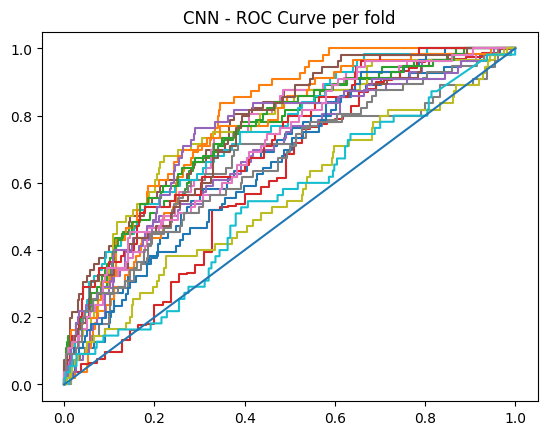

In [ ]:
for i in range(len(cnn_metrics['FPR'])):
  FPR = to_float_array(cnn_metrics['FPR'][i])
  TPR = to_float_array(cnn_metrics['TPR'][i])
  if i == 3:
    plt.plot(TPR, FPR) #axis are flipped for the 4th fold
  else:
    plt.plot(FPR, TPR)

plt.plot([0, 1], [0, 1])
plt.title('CNN - ROC Curve per fold')
plt.show()

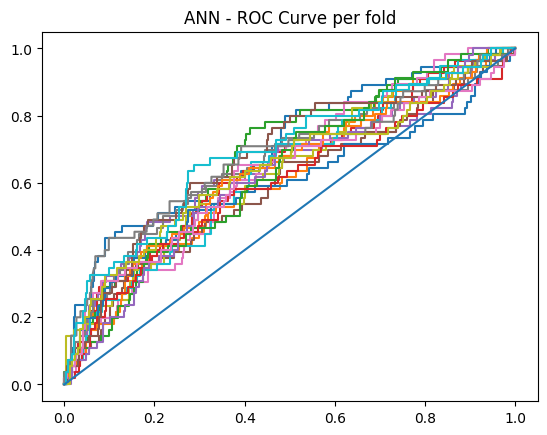

In [ ]:
for i in range(len(cnn_metrics['FPR'])):
  FPR = to_float_array(ann_metrics['FPR'][i])
  TPR = to_float_array(ann_metrics['TPR'][i])
  plt.plot(FPR, TPR)

plt.plot([0, 1], [0, 1])
plt.title('ANN - ROC Curve per fold')
plt.show()

# Training time

In [ ]:
import glob

# Récupère tous les fichiers texte d'un dossier
fichiers = glob.glob("*.txt")

data = []

for f in fichiers:
    mesures = {"fichier": f.split("/")[-1]}  #dictionnaire pour ce fichier
    with open(f, "r", encoding="utf-8") as file:
        for ligne in file:
            #Exemple : "CNN 9741.59652686119s"
            parts = ligne.strip().split()
            if len(parts) == 2:
                archi = parts[0]                # "CNN" ou "ANN"
                valeur = float(parts[1][:-1])   # enlever le 's' et convertir en float
                mesures[archi] = valeur
    data.append(mesures)

#Construire le DataFrame
df = pd.DataFrame(data)

print(df)


                    fichier           CNN          ANN
0    execution_time_1-4.txt   9741.596527  2049.747654
1    execution_time_5-8.txt  11099.720914  2110.488569
2   execution_time_9-15.txt  20323.499093  4380.069375
3  execution_time_16-20.txt  10526.094645  2135.760991
